In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df = pd.read_csv('case_study.csv', index_col=0)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
zero_bp = {4:1, 
            3:2,
            7: np.nan,
            9: np.nan}

df['BPHIGH4'] = df['BPHIGH4'].replace(zero_bp)

In [5]:
df.dropna(subset=['BPHIGH4'], inplace=True)

In [6]:
df['BPHIGH4'].value_counts()

2.0    20885
1.0    13516
Name: BPHIGH4, dtype: int64

In [7]:
zero_genhlth = {7: np.nan,
            9: np.nan}

df['GENHLTH'] = df['GENHLTH'].replace(zero_genhlth)

In [8]:
df.dropna(subset=['GENHLTH'], inplace=True)

In [9]:
df['GENHLTH'].value_counts()

2.0    11438
3.0    10356
1.0     6479
4.0     4459
5.0     1574
Name: GENHLTH, dtype: int64

In [10]:
zero_lb = { 7777: np.nan,
            9999: np.nan,
            }

df['WEIGHT2'] = df['WEIGHT2'].replace(zero_lb)
df.dropna(subset=['WEIGHT2'], inplace=True)

In [11]:
w_dict = {7777: np.nan, 9999: np.nan}
df['weight'] = np.where((df['WEIGHT2'] >= 9000) & (df['WEIGHT2'] < 9999), (df['WEIGHT2']-9000)*2.2, df['WEIGHT2'])

In [12]:
df['weight'].describe()

count    31650.000000
mean       174.868897
std         43.445540
min         53.000000
25%        145.000000
50%        170.000000
75%        200.000000
max        600.000000
Name: weight, dtype: float64

In [152]:
# confidence intervasl for a sample mean
weight_mean = df['weight'].mean()
weight_std = df['weight'].std()
ci = stats.norm.interval(alpha = .95, loc = weight_mean, scale = weight_std)
ci

(89.71720436669409, 260.0205902620579)

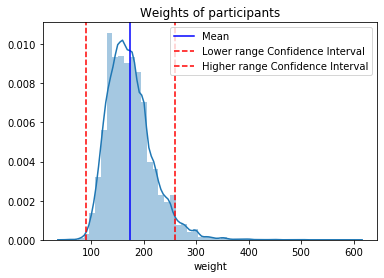

In [70]:
figsize=(15,15)
sns.distplot(df['weight'])
plt.axvline(weight_mean ,color='b', linestyle='-')
plt.axvline(ci[0], color='r', linestyle='--')
plt.axvline(ci[1], color='r', linestyle='--')
plt.legend({'Mean':weight_mean,'Lower range Confidence Interval':ci[0],'Higher range Confidence Interval':ci[1]})
plt.title('Weights of participants')
plt.show()

In [14]:
# confidence interval for a sample proportion of yes
yes_high = df['BPHIGH4'].value_counts()[1]
pro_yes = yes_high/len(df['BPHIGH4'])
se = np.sqrt((pro_yes*(1-pro_yes))/len(df['BPHIGH4']))
pro_yes, se

(0.3933333333333333, 0.0027457980088279404)

In [15]:
low=pro_yes-1.96*se
high=pro_yes+1.96*se
low, high

(0.3879515692360305, 0.3987150974306361)

In [128]:
df['BPHIGH4'].value_counts()

2.0    19201
1.0    12449
Name: BPHIGH4, dtype: int64

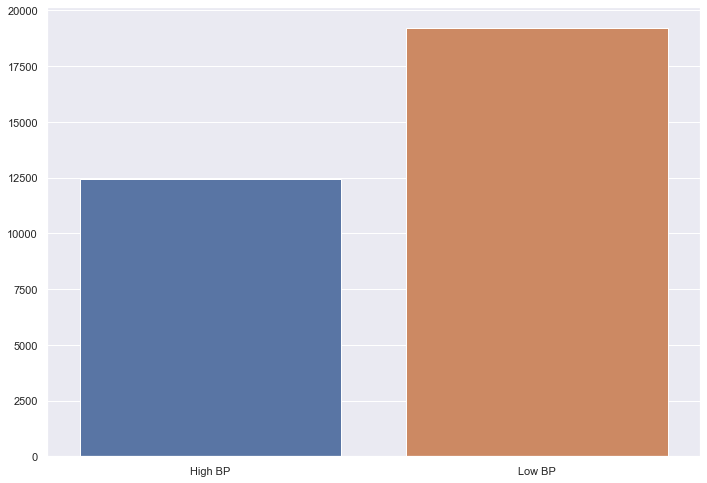

In [143]:
sns.barplot(x=['High BP', 'Low BP'], y= [df['BPHIGH4'].value_counts()[1], df['BPHIGH4'].value_counts()[2]])

plt.show()

In [23]:
# mean weight vs highbp
highbp_weight_mean =df.loc[df['BPHIGH4']==1]['weight'].mean()
highbp_weight_std =df.loc[df['BPHIGH4']==1]['weight'].std()
high_n = len(df.loc[df['BPHIGH4']==1])

lowbp_weight_mean = df.loc[df['BPHIGH4']==2]['weight'].mean()
lowbp_weight_std =df.loc[df['BPHIGH4']==2]['weight'].std()
low_n = len(df.loc[df['BPHIGH4']==2])

pool_dev_num = (high_n-1)*highbp_weight_std**2+(low_n-1)*lowbp_weight_std**2
pool_dev_denom= high_n+low_n-2
pool_std = np.sqrt(pool_dev_num/pool_dev_denom)

t_num = highbp_weight_mean-lowbp_weight_mean
t_denom = pool_std*np.sqrt((1/high_n)+(1/low_n))
t_stat = t_num/t_denom
t_stat
print(t_stat,'reject null hypothesis')

37.14568692422637 reject null hypothesis


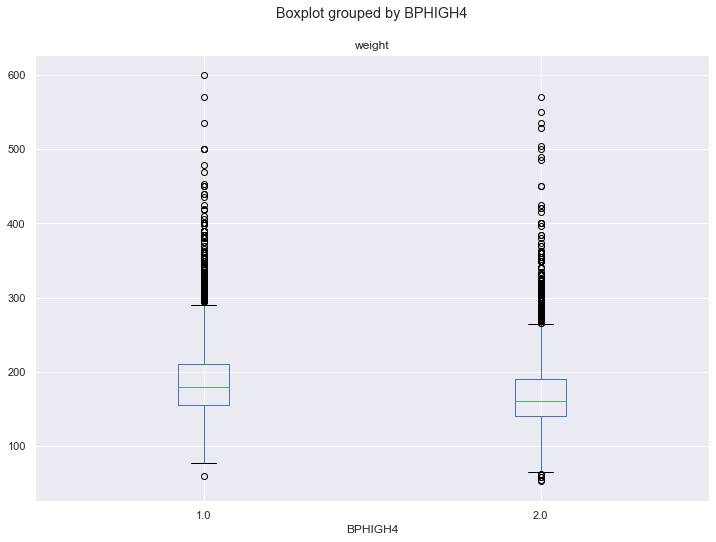

In [149]:
df.boxplot('weight', by = 'BPHIGH4')

In [37]:
# excellent poor vs highbp
p_excell_highbp = df.groupby('GENHLTH')['BPHIGH4'].value_counts(normalize = True)[5][1] 
p_poor_highbp = df.groupby('GENHLTH')['BPHIGH4'].value_counts(normalize = True)[1][1]

n_excellent = len(df.loc[df['GENHLTH']==5])
n_poor = len(df.loc[df['GENHLTH']==1])

z_num = p_excell_highbp-p_poor_highbp
z_denom = np.sqrt(((p_excell_highbp*(1-p_excell_highbp))/n_excellent)+((p_poor_highbp*(1-p_poor_highbp))/n_poor))
z=z_num/z_denom
print(z,'reject null hypothesis')

34.21881714297439

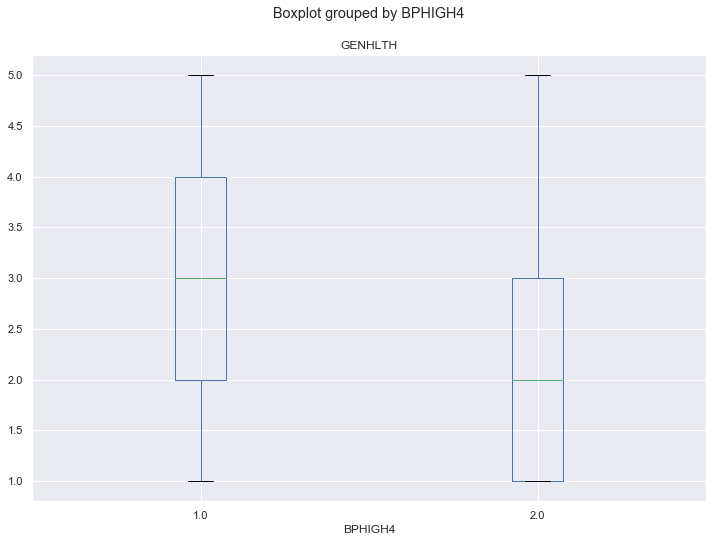

In [151]:
df.boxplot('GENHLTH', by= 'BPHIGH4')

In [48]:
# chi^2 bp X gen health
low_bp = df.groupby('BPHIGH4')['GENHLTH'].value_counts()[2].sort_index()
high_bp =df.groupby('BPHIGH4')['GENHLTH'].value_counts()[1].sort_index()
bp_array = np.array([low_bp,high_bp])
stat, p, dof, expected = chi2_contingency(bp_array)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=9.488, stat=2264.991
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [120]:
low_bp = df.groupby('BPHIGH4')['GENHLTH'].value_counts()[2].sort_index()
high_bp

GENHLTH
1.0    1200
2.0    3574
3.0    4298
4.0    2405
5.0     972
Name: GENHLTH, dtype: int64

In [49]:
# ANOVA weight vs genhlth
stats.f_oneway(df['weight'][df['GENHLTH'] == 5],
                df['weight'][df['GENHLTH'] == 4], 
                df['weight'][df['GENHLTH'] == 3],
                df['weight'][df['GENHLTH'] == 2],
              df['weight'][df['GENHLTH'] ==1])


F_onewayResult(statistic=239.98943047882705, pvalue=2.0711122371928457e-203)

In [88]:
excellent = df['weight'][df['GENHLTH'] == 5]
ex_mean = df.loc[df['GENHLTH'] == 5]['weight'].mean()

very_good = df['weight'][df['GENHLTH'] == 4]
vgood_mean = df.loc[df['GENHLTH'] == 4]['weight'].mean()

good = df['weight'][df['GENHLTH'] == 3]
good_mean = df.loc[df['GENHLTH'] == 3]['weight'].mean()

fair = df['weight'][df['GENHLTH'] == 2]
fair_mean = df.loc[df['GENHLTH'] == 2]['weight'].mean()

poor = df['weight'][df['GENHLTH'] ==1]
poor_mean = df.loc[df['GENHLTH'] == 1]['weight'].mean()


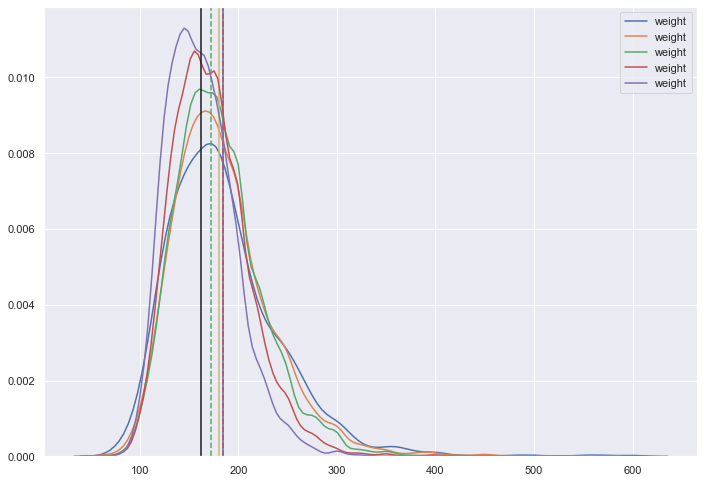

In [145]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(excellent)
plt.axvline(ex_mean ,color='b', linestyle='-')

sns.kdeplot(very_good)
plt.axvline(vgood_mean ,color='r', linestyle='--')

sns.kdeplot(good)
plt.axvline(good_mean ,color='y', linestyle='-')

sns.kdeplot(fair)
plt.axvline(fair_mean ,color='g', linestyle='--')

sns.kdeplot(poor)
plt.axvline(poor_mean ,color='k', linestyle='-')

plt.show()